# **Import Iibrary**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


# **Upload Data**

In [ ]:
df =pd.read_csv('/content/titanic_toy.csv')


In [ ]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


# **Missing Value**

In [ ]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

# **Split Data**

In [ ]:
X  =df.drop(columns=['Survived'])
y = df['Survived']

# **Train and Test Data**

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [ ]:
X_train.shape , X_test.shape

((712, 3), (179, 3))

# **X_train missing value**

In [ ]:
X_train.isnull().mean()

Age       0.196629
Fare      0.050562
Family    0.000000
dtype: float64

# **Replace the missing value in mean & median**

Mean/median imputation has the assumption that the data are missing completely at random (MCAR). If this is the case, we can think of replacing the NA with the most frequent occurrence of the variable, which is the mean if the variable has a Gaussian distribution, or the median otherwise.

In [ ]:
mean_age =X_train['Age'].mean()
median_age =X_train['Age'].median()


mean_fare =X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [ ]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median']= X_train['Fare'].fillna(median_fare)
X_train['Fare_mean'] =X_train['Fare'].fillna(mean_fare)

In [ ]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
193,3.0,26.000,2,3.0,3.0,26.000,26.000000
537,30.0,106.425,0,30.0,30.0,106.425,106.425000
649,23.0,NaN,0,23.0,23.0,14.400,32.517788
238,19.0,10.500,0,19.0,19.0,10.500,10.500000
582,54.0,26.000,0,54.0,54.0,26.000,26.000000


In [ ]:
print('original Age Variable variance' , X_train['Age'].var())
print('After Check median imputer', X_train['Age_mean'].var())
print('After Check mean imputer', X_train['Age_mean'].var())


print('original Fare Variable variance' , X_train['Fare'].var())
print('After Check median imputer', X_train['Fare_median'].var())
print('After Check mean imputer' , X_train['Fare_mean'].var())

original Age Variable variance 210.2517072477435
After Check median imputer 168.85193366872227
After Check mean imputer 168.85193366872227
original Fare Variable variance 2761.0314349486343
After Check median imputer 2637.012481677765
After Check mean imputer 2621.232374951235


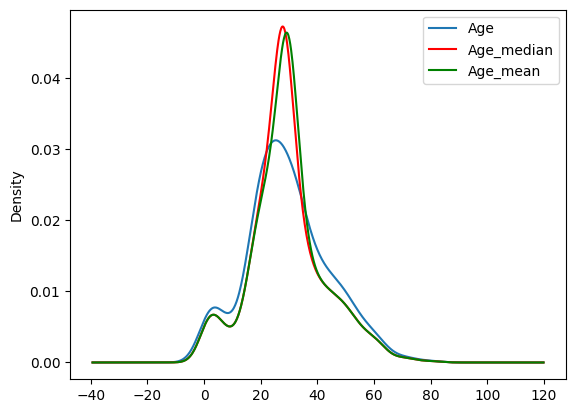

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)

#origial variable
X_train['Age'].plot(kind='kde', ax=ax)

#variable imputer in madian
X_train['Age_median'].plot(kind='kde' , ax=ax, color='red')

#variable imputer in mean

X_train['Age_mean'].plot(kind='kde', ax=ax,color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')




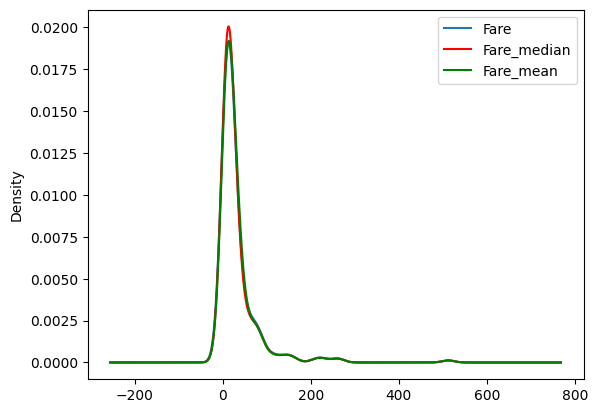

In [ ]:
fig =plt.figure()
ax = fig.add_subplot(111)

#origial variable
X_train['Fare'].plot(kind='kde', ax=ax)

#variable imputer in madian
X_train['Fare_median'].plot(kind='kde' , ax=ax, color='red')

#variable imputer in mean

X_train['Fare_mean'].plot(kind='kde', ax=ax,color='green')

#add legend
lines, labels = ax.get_legend_handles_labels()

ax.legend(lines, labels, loc='best')




In [ ]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,210.251707,75.481375,-6.993325,210.251707,210.251707,70.082085,71.193767
Fare,75.481375,2761.031435,18.599163,63.938058,60.224654,2761.031435,2761.031435
Family,-6.993325,18.599163,2.830892,-5.587710,-5.616299,17.672035,17.657433
Age_median,210.251707,63.938058,-5.587710,169.207310,168.851934,59.728510,60.700688
Age_mean,210.251707,60.224654,-5.616299,168.851934,168.851934,56.282518,57.175304
Fare_median,70.082085,2761.031435,17.672035,59.728510,56.282518,2637.012482,2621.232375
Fare_mean,71.193767,2761.031435,17.657433,60.700688,57.175304,2621.232375,2621.232375


<Axes: >

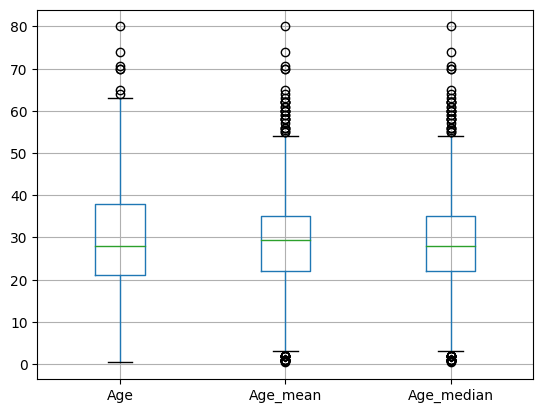

In [ ]:
X_train[['Age', 'Age_mean', 'Age_median']].boxplot()

<Axes: >

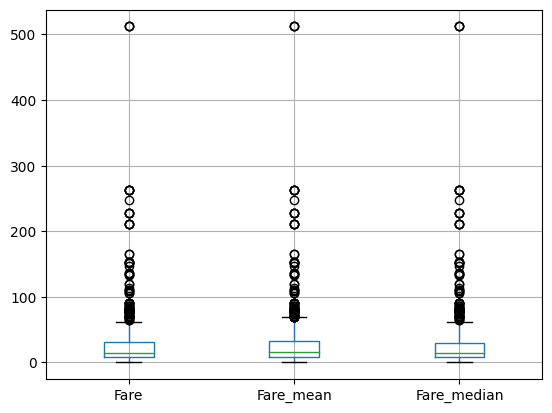

In [ ]:
X_train[['Fare', 'Fare_mean', 'Fare_median']].boxplot()

# **using Sklearn**

In [ ]:
X_train, X_test ,y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=2)

In [ ]:
imputer1 = SimpleImputer(strategy='median')
imputer2 =SimpleImputer(strategy='mean')

In [ ]:
trf =ColumnTransformer([
    ('imputer1', imputer1,['Age']),
    ('imputer2', imputer2,['Fare'])

],remainder='passthrough')

In [ ]:
X_train

,Age,Fare,Family
30,40.0,27.7208,0
10,4.0,16.7000,2
873,47.0,9.0000,0
182,9.0,31.3875,6
876,20.0,9.8458,0
...,...,...,...
534,30.0,8.6625,0
584,NaN,8.7125,0
493,71.0,49.5042,0
527,NaN,221.7792,0


In [ ]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [ ]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [ ]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [ ]:
X_train= trf.transform(X_train)
X_test = trf.transform(X_test)

ValueError: Specifying the columns using strings is only supported for pandas DataFrames